# Credit Risk Modeling - Calculating Expected Loss
$$EL=PD\times LGD\times EAD$$
Banks don't really care about the loss they'll experience from a single borrower. It is negligible compared to their overall exposure. That's why we'd much rather find the total expected loss across all borrowers.

The total expected loss is the sum of the expected loss of all accounts.

**Import Libraries**

In [83]:
import numpy as np
import pandas as pd

**Import Data**

In [84]:
loan_data_preprocessed_backup = pd.read_csv('loan_data_2007_2014_preprocessed.csv', low_memory=False)

**Explore Data**

In [85]:
# Make a copy of data
loan_data_preprocessed = loan_data_preprocessed_backup.copy()
# Displays all column names
loan_data_preprocessed.columns.values

array(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'member_id', 'loan_amnt',
       'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_join

In [86]:
loan_data_preprocessed.head()

,Unnamed: 0.1,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,good_bad
0,0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,...,0,0,0,0,0,0,0,1,0,1
1,1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,...,0,0,0,0,0,0,0,1,0,0
2,2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,...,0,0,0,0,0,0,0,1,0,1
3,3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,...,0,0,0,0,0,0,0,1,0,1
4,4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,...,0,0,0,0,0,0,0,1,0,1


In [87]:
loan_data_preprocessed.tail()

,Unnamed: 0.1,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,good_bad
466280,466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,...,0,0,0,0,0,0,0,0,1,1
466281,466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,...,0,0,0,0,0,0,0,1,0,0
466282,466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,...,0,0,0,0,0,0,0,1,0,1
466283,466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,...,0,0,0,0,0,0,0,0,1,1
466284,466284,466284,9199665,11061576,10000,10000,9975.0,36 months,19.20,367.58,...,0,0,0,0,0,0,0,1,0,1


In [88]:
# Take only the accounts that were charged-off (written-off)
loan_data_defaults = loan_data_preprocessed[loan_data_preprocessed['loan_status'].isin(
    ['Charged Off','Does not meet the credit policy. Status:Charged Off'])]

In [89]:
loan_data_defaults.shape

(43236, 209)

In [90]:
# Set the pandas dataframe options to display all columns/rows
pd.options.display.max_rows = None

In [91]:
loan_data_defaults.isnull().sum()

Unnamed: 0.1                                                           0
Unnamed: 0                                                             0
id                                                                     0
member_id                                                              0
loan_amnt                                                              0
funded_amnt                                                            0
funded_amnt_inv                                                        0
term                                                                   0
int_rate                                                               0
installment                                                            0
grade                                                                  0
sub_grade                                                              0
emp_title                                                           3287
emp_length                                         

## Independent Variables

In [93]:
# Fill the missing values with zeroes
loan_data_defaults['mths_since_last_delinq'].fillna(0, inplace = True)

C:\Users\My Pham\AppData\Local\Temp\ipykernel_16620\1127906613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['mths_since_last_delinq'].fillna(0, inplace = True)


In [94]:
#loan_data_defaults['mths_since_last_delinq'].fillna(loan_data_defaults['mths_since_last_delinq'].max() + 12, inplace=True)

In [95]:
# Fill the missing values with zeroes
loan_data_defaults['mths_since_last_record'].fillna(0, inplace=True)

C:\Users\My Pham\AppData\Local\Temp\ipykernel_16620\1127508641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['mths_since_last_record'].fillna(0, inplace=True)


## Dependent Variables

In [96]:
# Calculate the dependent variable for the LGD model: recovery rate - the ratio of recoveries and funded amount
loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries'] / loan_data_defaults['funded_amnt']

C:\Users\My Pham\AppData\Local\Temp\ipykernel_16620\2015564742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries'] / loan_data_defaults['funded_amnt']


In [97]:
# Show some descriptive statisics for the values of a column
loan_data_defaults['recovery_rate'].describe()

count    43236.000000
mean         0.060820
std          0.089770
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.220774
Name: recovery_rate, dtype: float64

In [98]:
# Set recovery rates that are greater than 1 to 1 and recovery rates that are less than 0 to 0
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] > 1, 1, loan_data_defaults['recovery_rate'])
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] < 0, 0, loan_data_defaults['recovery_rate'])

C:\Users\My Pham\AppData\Local\Temp\ipykernel_16620\3427737799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] > 1, 1, loan_data_defaults['recovery_rate'])
C:\Users\My Pham\AppData\Local\Temp\ipykernel_16620\3427737799.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] < 0, 0, loan_data_defaults['recovery_rate'])


In [99]:
# Show some descriptive statisics for the values of a column
loan_data_defaults['recovery_rate'].describe()

count    43236.000000
mean         0.060770
std          0.089202
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.000000
Name: recovery_rate, dtype: float64

In [100]:
# Calculate the dependent variable for the EAD model: credit conversion factor 
# The ratio of the difference of the amount used at the moment of default to the total funded amount
loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp']) / loan_data_defaults['funded_amnt']

C:\Users\My Pham\AppData\Local\Temp\ipykernel_16620\36220493.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp']) / loan_data_defaults['funded_amnt']


In [101]:
# Show some descriptive statisics for the values of a column
loan_data_defaults['CCF'].describe()

count    43236.000000
mean         0.735952
std          0.200742
min          0.000438
25%          0.632088
50%          0.789908
75%          0.888543
max          1.000000
Name: CCF, dtype: float64

In [ ]:
# Save the data to a CSV file
loan_data_defaults.to_csv('loan_data_defaults.csv')

## Explore Dependent Variables

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(array([2.0651e+04, 3.7200e+02, 6.4200e+02, 1.1950e+03, 1.9300e+03,
        1.9430e+03, 6.4500e+02, 7.4900e+02, 8.9700e+02, 1.2360e+03,
        1.5530e+03, 1.7910e+03, 2.3140e+03, 2.4510e+03, 1.0410e+03,
        6.7200e+02, 7.0600e+02, 4.7300e+02, 1.9600e+02, 2.1000e+02,
        1.8600e+02, 1.5500e+02, 1.5900e+02, 1.1500e+02, 5.6000e+01,
        6.1000e+01, 4.2000e+01, 5.1000e+01, 4.6000e+01, 3.5000e+01,
        4.0000e+01, 3.3000e+01, 2.9000e+01, 2.5000e+01, 3.2000e+01,
        4.0000e+01, 2.7000e+01, 3.0000e+01, 1.6000e+01, 1.4000e+01,
        2.7000e+01, 2.0000e+01, 1.7000e+01, 1.0000e+01, 6.0000e+00,
        1.1000e+01, 5.0000e+00, 1.0000e+01, 1.1000e+01, 9.0000e+00,
        1.2000e+01, 1.1000e+01, 9.0000e+00, 8.0000e+00, 3.0000e+00,
        4.0000e+00, 3.0000e+00, 8.0000e+00, 2.0000e+00, 5.0000e+00,
        3.0000e+00, 5.0000e+00, 5.0000e+00, 2.0000e+00, 4.0000e+00,
        3.0000e+00, 6.0000e+00, 2.0000e+00, 3.0000e+00, 4.0000e+00,
        6.0000e+00, 4.0000e+00, 4.0000e+00, 2.00

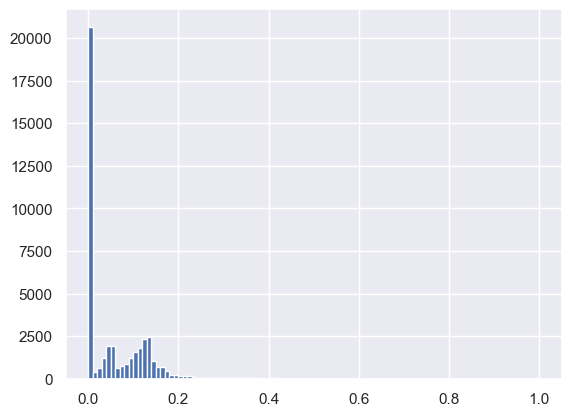

In [103]:
# Plot a histogram of a variable with 100 bins
plt.hist(loan_data_defaults['recovery_rate'], bins = 100)

(array([2.1023e+04, 1.8370e+03, 3.8730e+03, 1.3940e+03, 2.1330e+03,
        3.3440e+03, 4.7650e+03, 1.7130e+03, 1.1790e+03, 4.0600e+02,
        3.4100e+02, 2.7400e+02, 1.1700e+02, 9.3000e+01, 8.1000e+01,
        7.3000e+01, 5.4000e+01, 7.2000e+01, 5.7000e+01, 3.0000e+01,
        4.7000e+01, 2.7000e+01, 1.7000e+01, 1.5000e+01, 2.0000e+01,
        2.3000e+01, 1.7000e+01, 7.0000e+00, 1.1000e+01, 7.0000e+00,
        8.0000e+00, 7.0000e+00, 7.0000e+00, 8.0000e+00, 7.0000e+00,
        1.0000e+01, 6.0000e+00, 1.1000e+01, 9.0000e+00, 9.0000e+00,
        6.0000e+00, 6.0000e+00, 6.0000e+00, 3.0000e+00, 9.0000e+00,
        9.0000e+00, 1.5000e+01, 8.0000e+00, 9.0000e+00, 3.3000e+01]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.

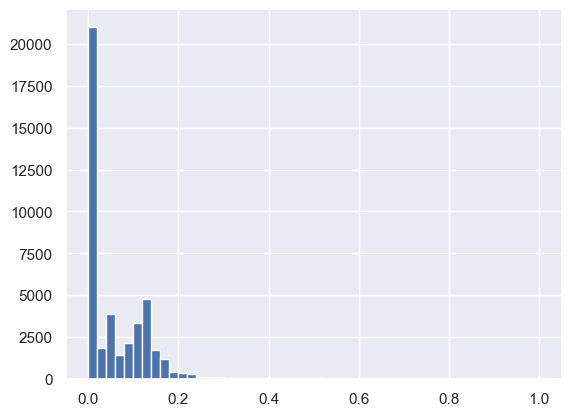

In [104]:
# Plot a histogram of a variable with 50 bins
plt.hist(loan_data_defaults['recovery_rate'], bins = 50)

(array([   3.,   17.,   16.,   44.,   16.,   13.,   71.,   26.,    7.,
          63.,   67.,   17.,   60.,   90.,   23.,   55.,   82.,   42.,
          47.,  123.,   82.,   70.,  122.,   86.,   89.,  110.,  117.,
         111.,  122.,  120.,  135.,  141.,  154.,  146.,  160.,  175.,
         152.,  187.,  202.,  174.,  204.,  208.,  210.,  211.,  241.,
         264.,  281.,  224.,  308.,  267.,  287.,  296.,  340.,  274.,
         365.,  370.,  392.,  364.,  393.,  419.,  411.,  429.,  445.,
         497.,  481.,  478.,  569.,  568.,  599.,  618.,  727.,  691.,
         626.,  805.,  804.,  776.,  881.,  851.,  916.,  934.,  925.,
        1078.,  933., 1218., 1041., 1082., 1336., 1040., 1374., 1073.,
        1406., 1287.,  952., 1414.,  795., 1320.,  578.,  949.,  343.,
         531.]),
 array([4.3800000e-04, 1.0433620e-02, 2.0429240e-02, 3.0424860e-02,
        4.0420480e-02, 5.0416100e-02, 6.0411720e-02, 7.0407340e-02,
        8.0402960e-02, 9.0398580e-02, 1.0039420e-01, 1.1038982e-01

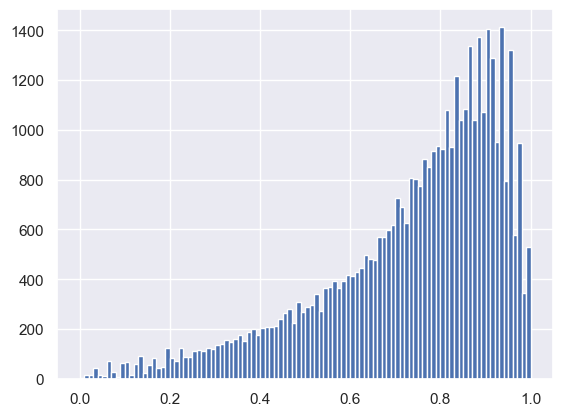

In [105]:
# Plot a histogram of a variable with 100 bins
plt.hist(loan_data_defaults['CCF'], bins = 100)

In [107]:
# Create a new variable which is 0 if recovery rate is 0 and 1 otherwise
loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate'] == 0, 0, 1)
# loan_data_defaults['recovery_rate_0_1']

C:\Users\My Pham\AppData\Local\Temp\ipykernel_16620\598558812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate'] == 0, 0, 1)


## LGD Model

**Splitting Data**

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
# LGD model stage 1 datasets: recovery rate 0 or greater than 0
# Take a set of inputs and a set of targets as arguments. Splits the inputs and the targets into four dataframes:
# Inputs - Train, Inputs - Test, Targets - Train, Targets - Test
lgd_inputs_stage_1_train, lgd_inputs_stage_1_test, lgd_targets_stage_1_train, lgd_targets_stage_1_test = train_test_split(loan_data_defaults.drop(['good_bad', 'recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), loan_data_defaults['recovery_rate_0_1'], test_size = 0.2, random_state = 42)

**Preparing the Inputs**

In [110]:
# List of all independent variables for the models
features_all = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:MORTGAGE',
'home_ownership:NONE',
'home_ownership:OTHER',
'home_ownership:OWN',
'home_ownership:RENT',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:car',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educational',
'purpose:home_improvement',
'purpose:house',
'purpose:major_purchase',
'purpose:medical',
'purpose:moving',
'purpose:other',
'purpose:renewable_energy',
'purpose:small_business',
'purpose:vacation',
'purpose:wedding',
'initial_list_status:f',
'initial_list_status:w',
'term_int',
'emp_length_int',
'mths_since_issue_d',
'mths_since_earliest_cr_line',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim']

In [111]:
# List of the dummy variable reference categories
features_reference_cat = ['grade:G',
'home_ownership:RENT',
'verification_status:Verified',
'purpose:credit_card',
'initial_list_status:f']

In [112]:
# Keep only the variables we need for the model
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train[features_all]

In [ ]:
# Remove the dummy variable reference categories
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train.drop(features_reference_cat, axis = 1)

In [113]:
# Check for missing values - whether the value of each row for each column is missing or not, then sum accross columns
lgd_inputs_stage_1_train.isnull().sum()

grade:A                                0
grade:B                                0
grade:C                                0
grade:D                                0
grade:E                                0
grade:F                                0
grade:G                                0
home_ownership:MORTGAGE                0
home_ownership:NONE                    0
home_ownership:OTHER                   0
home_ownership:OWN                     0
home_ownership:RENT                    0
verification_status:Not Verified       0
verification_status:Source Verified    0
verification_status:Verified           0
purpose:car                            0
purpose:credit_card                    0
purpose:debt_consolidation             0
purpose:educational                    0
purpose:home_improvement               0
purpose:house                          0
purpose:major_purchase                 0
purpose:medical                        0
purpose:moving                         0
purpose:other   

**Estimating the Model**

In [114]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs, solver='lbfgs', max_iter=1000)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        # Get p-values for the fitted model 
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)                          # Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij)                        # Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates        # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] # two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        #self.z_scores = z_scores
        self.p_values = p_values
        #self.sigma_estimates = sigma_estimates
        #self.F_ij = F_ij

In [115]:
# Create an instance of an object from the 'LogisticRegression' class
reg_lgd_st_1 = LogisticRegression_with_p_values()
# Estimate the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe
reg_lgd_st_1.fit(lgd_inputs_stage_1_train, lgd_targets_stage_1_train)

C:\Users\My Pham\AppData\Local\Temp\ipykernel_16620\1906773625.py:21: RuntimeWarning: invalid value encountered in sqrt
  sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))


In [123]:
# Store the names of the columns of a dataframe in a variable
feature_name = lgd_inputs_stage_1_train.columns.values
# feature_name

In [117]:
# Create a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Create a new column in the dataframe, called 'Coefficients', with row values the transposed coefficients from the 'LogisticRegression' object
summary_table['Coefficients'] = np.transpose(reg_lgd_st_1.coef_)
# Increase the index of every row of the dataframe with 1
summary_table.index = summary_table.index + 1
# Assign values of the row with index 0 of the dataframe
summary_table.loc[0] = ['Intercept', reg_lgd_st_1.intercept_[0]]
# Sort the dataframe by index
summary_table = summary_table.sort_index()
# Take the result of the newly added method 'p_values' and store it in a variable 'p_values'
p_values = reg_lgd_st_1.p_values
# Add the value 'NaN' in the beginning of the variable with p-values
p_values = np.append(np.nan,np.array(p_values))
# In the 'summary_table' dataframe, add a new column, called 'p_values', containing the values from the 'p_values' variable
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-3.920183e-04,NaN
1,grade:A,-6.055488e-05,1.000000e+00
2,grade:B,-2.621537e-04,1.000000e+00
3,grade:C,-4.087513e-04,1.000000e+00
4,grade:D,4.166648e-05,1.000000e+00
5,grade:E,4.837578e-05,1.000000e+00
6,grade:F,2.132208e-04,1.000000e+00
7,grade:G,3.617852e-05,1.000000e+00
8,home_ownership:MORTGAGE,-9.101961e-05,NaN
9,home_ownership:NONE,2.443105e-06,NaN


In [ ]:
# summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# summary_table['Coefficients'] = np.transpose(reg_lgd_st_1.coef_)
# summary_table.index = summary_table.index + 1
# summary_table.loc[0] = ['Intercept', reg_lgd_st_1.intercept_[0]]
# summary_table = summary_table.sort_index()
# p_values = reg_lgd_st_1.p_values
# p_values = np.append(np.nan,np.array(p_values))
# summary_table['p_values'] = p_values
# summary_table

**Testing the Model**

In [118]:
# Keep only the variables we need for the model
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test[features_all]

In [119]:
# Remove the dummy variable reference categories
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test.drop(features_reference_cat, axis = 1)

In [120]:
# Calculate the predicted values for the dependent variable (targets) based on the values of the independent variables (inputs) supplied as an argument
y_hat_test_lgd_stage_1 = reg_lgd_st_1.model.predict(lgd_inputs_stage_1_test)
y_hat_test_lgd_stage_1

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- grade:G
- home_ownership:RENT
- initial_list_status:f
- purpose:credit_card
- verification_status:Verified


In [121]:
# Calculate the predicted probability values for the dependent variable (targets) based on the values of the independent variables (inputs) supplied as an argument
y_hat_test_proba_lgd_stage_1 = reg_lgd_st_1.model.predict_proba(lgd_inputs_stage_1_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- grade:G
- home_ownership:RENT
- initial_list_status:f
- purpose:credit_card
- verification_status:Verified


In [ ]:
# This is an array of arrays of predicted class probabilities for all classes
# In this case, the first value of every sub-array is the probability for the observation to belong to the first class, i.e. 0,
# and the second value is the probability for the observation to belong to the first class, i.e. 1
y_hat_test_proba_lgd_stage_1

In [ ]:
# Take all the arrays in the array, and from each array, we take all rows, and only the element with index 1 (the second element)
# In other words, take only the probabilities for being 1
y_hat_test_proba_lgd_stage_1 = y_hat_test_proba_lgd_stage_1[: ][: , 1]
y_hat_test_proba_lgd_stage_1

In [ ]:
lgd_targets_stage_1_test_temp = lgd_targets_stage_1_test

In [ ]:
# Reset the index of a dataframe
lgd_targets_stage_1_test_temp.reset_index(drop = True, inplace = True)

In [ ]:
# Concatenate two dataframes
df_actual_predicted_probs = pd.concat([lgd_targets_stage_1_test_temp, pd.DataFrame(y_hat_test_proba_lgd_stage_1)], axis = 1)

In [ ]:
df_actual_predicted_probs.columns = ['lgd_targets_stage_1_test', 'y_hat_test_proba_lgd_stage_1']

In [ ]:
# Make the index of one dataframe equal to the index of another dataframe
df_actual_predicted_probs.index = lgd_inputs_stage_1_test.index
df_actual_predicted_probs.head()

**Estimating the Аccuracy of the Мodel**

In [ ]:
# Create a new column with an indicator
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0
tr = 0.5
df_actual_predicted_probs['y_hat_test_lgd_stage_1'] = np.where(df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'] > tr, 1, 0)

In [ ]:
# Create a Confusion Matrix cross-table where the actual values are displayed by rows and the predicted values by columns
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted'])

In [ ]:
# Divide each value of the table by the total number of observations, thus getting percentages, or, rates
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

In [ ]:
# Calculate Accuracy of the model, which is the sum of the diagonal rates
(pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

In [ ]:
# Return the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds
# Store each of the three arrays in a separate variable
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])

In [ ]:
# Plot the false positive rate along the x-axis and the true positive rate along the y-axis, thus plotting the ROC curve
plt.plot(fpr, tpr)
# Plot a seconary diagonal line, with dashed line style and black color
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# Name the x-axis "False positive rate"
plt.xlabel('False positive rate')
# Name the x-axis "True positive rate"
plt.ylabel('True positive rate')
# Name the graph "ROC curve"
plt.title('ROC curve')

In [ ]:
# Calculat the Area Under the Receiver Operating Characteristic Curve (AUROC) from a set of actual values and their predicted probabilities
AUROC = roc_auc_score(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])
AUROC

**Saving the Model**

In [ ]:
import pickle

In [ ]:
# Export our model to a 'SAV' file with file name 'lgd_model_stage_1.sav'
pickle.dump(reg_lgd_st_1, open('lgd_model_stage_1.sav', 'wb'))

## Stage 2 – Linear Regression

In [ ]:
# Take only rows where the original recovery rate variable is greater than one, i.e. where the indicator variable we created is equal to 1
lgd_stage_2_data = loan_data_defaults[loan_data_defaults['recovery_rate_0_1'] == 1]

In [ ]:
# LGD model stage 2 datasets: how much more than 0 is the recovery rate
# Take a set of inputs and a set of targets as arguments, split the inputs and the targets into four dataframes:
# Inputs - Train, Inputs - Test, Targets - Train, Targets - Test
lgd_inputs_stage_2_train, lgd_inputs_stage_2_test, lgd_targets_stage_2_train, lgd_targets_stage_2_test = train_test_split(lgd_stage_2_data.drop(['good_bad', 'recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), lgd_stage_2_data['recovery_rate'], test_size = 0.2, random_state = 42)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Since the p-values are obtained through certain statistics, we need the 'stat' module from scipy.stats
import scipy.stats as stat

# Since we are using an object oriented language such as Python, we can simply define our own 
# LinearRegression class (the same one from sklearn)
# By typing the code below we will ovewrite a part of the class with one that includes p-values
# Here's the full source code of the ORIGINAL class: https://github.com/scikit-learn/scikit-learn/blob/7b136e9/sklearn/linear_model/base.py#L362


class LinearRegression(linear_model.LinearRegression):
    """
    LinearRegression class after sklearn's, but calculate t-statistics
    and p-values for model coefficients (betas).
    Additional attributes available after .fit()
    are `t` and `p` which are of the shape (y.shape[1], X.shape[1])
    which is (n_features, n_coefs)
    This class sets the intercept to 0 by default, since usually we include it
    in X.
    """
    
    # nothing changes in __init__
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True,
                 n_jobs=1, positive=False):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs
        self.positive = positive
    
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        
        # Calculate SSE (sum of squared errors)
        # and SE (standard error)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])

        # compute the t-statistic for each feature
        self.t = self.coef_ / se
        # find the p-value for each feature
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

In [ ]:
# import scipy.stats as stat

# class LinearRegression(linear_model.LinearRegression):
#     def __init__(self, fit_intercept=True, normalize=False, copy_X=True,
#                  n_jobs=1, positive=False):
#         self.fit_intercept = fit_intercept
#         self.normalize = normalize
#         self.copy_X = copy_X
#         self.n_jobs = n_jobs
#         self.positive = positive
#     def fit(self, X, y, n_jobs=1):
#         self = super(LinearRegression, self).fit(X, y, n_jobs)
#         sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
#         se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])
#         self.t = self.coef_ / se
#         self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
#         return self

In [ ]:
# Keep only the variables we need for the model
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train[features_all]

In [ ]:
# Remove the dummy variable reference categories
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train.drop(features_reference_cat, axis = 1)

In [ ]:
# Create an instance of an object from the 'LogisticRegression' class
reg_lgd_st_2 = LinearRegression()
# Estimate the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe
reg_lgd_st_2.fit(lgd_inputs_stage_2_train, lgd_targets_stage_2_train)

In [ ]:
# Store the names of the columns of a dataframe in a variable
feature_name = lgd_inputs_stage_2_train.columns.values

In [ ]:
# Create a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Create a new column in the dataframe, called 'Coefficients', with row values the transposed coefficients from the 'LogisticRegression' object
summary_table['Coefficients'] = np.transpose(reg_lgd_st_2.coef_)
# Increase the index of every row of the dataframe with 1
summary_table.index = summary_table.index + 1
# Assign values of the row with index 0 of the dataframe
summary_table.loc[0] = ['Intercept', reg_lgd_st_2.intercept_]
# Sort the dataframe by index
summary_table = summary_table.sort_index()
# Take the result of the newly added method 'p_values' and store it in a variable 'p_values'
p_values = reg_lgd_st_2.p
# Add the value 'NaN' in the beginning of the variable with p-values
p_values = np.append(np.nan,np.array(p_values))
# In the 'summary_table' dataframe, add a new column, called 'p_values', containing the values from the 'p_values' variable
summary_table['p_values'] = p_values.round(3)
summary_table

In [ ]:
# Code to use
# summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# summary_table['Coefficients'] = np.transpose(reg_lgd_st_2.coef_)
# summary_table.index = summary_table.index + 1
# summary_table.loc[0] = ['Intercept', reg_lgd_st_2.intercept_]
# summary_table = summary_table.sort_index()
# p_values = reg_lgd_st_2.p
# p_values = np.append(np.nan,np.array(p_values))
# summary_table['p_values'] = p_values.round(3)
# summary_table

## Stage 2 – Linear Regression Evaluation

In [ ]:
# Keep only the variables we need for the model
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test[features_all]

In [ ]:
# Remove the dummy variable reference categories
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test.drop(features_reference_cat, axis = 1)

In [ ]:
# Calculate the predicted values for the dependent variable (targets) based on the values of the independent variables (inputs) supplied as an argument
lgd_inputs_stage_2_test.columns.values

In [ ]:
# Calculate the predicted values for the dependent variable (targets) based on the values of the independent variables (inputs) supplied as an argument
y_hat_test_lgd_stage_2 = reg_lgd_st_2.predict(lgd_inputs_stage_2_test)
lgd_targets_stage_2_test_temp = lgd_targets_stage_2_test

In [ ]:
# Reset the index of a dataframe
lgd_targets_stage_2_test_temp = lgd_targets_stage_2_test_temp.reset_index(drop = True)

In [ ]:
# Calculate the correlation between actual and predicted values
pd.concat([lgd_targets_stage_2_test_temp, pd.DataFrame(y_hat_test_lgd_stage_2)], axis = 1).corr()

In [ ]:
# Plot the distribution of the residuals
sns.distplot(lgd_targets_stage_2_test - y_hat_test_lgd_stage_2)

In [ ]:
# Export our model to a 'SAV' file with file name 'lgd_model_stage_1.sav'
pickle.dump(reg_lgd_st_2, open('lgd_model_stage_2.sav', 'wb'))

## Combining Stage 1 and Stage 2

In [ ]:
y_hat_test_lgd_stage_2_all = reg_lgd_st_2.predict(lgd_inputs_stage_1_test)
y_hat_test_lgd_stage_2_all

In [ ]:
# Combine the predictions of the models from the two stages
y_hat_test_lgd = y_hat_test_lgd_stage_1 * y_hat_test_lgd_stage_2_all

In [ ]:
# Show some descriptive statisics for the values of a column
pd.DataFrame(y_hat_test_lgd).describe()

In [ ]:
# Set predicted values that are greater than 1 to 1 and predicted values that are less than 0 to 0
y_hat_test_lgd = np.where(y_hat_test_lgd < 0, 0, y_hat_test_lgd)
y_hat_test_lgd = np.where(y_hat_test_lgd > 1, 1, y_hat_test_lgd)

In [ ]:
# Show some descriptive statisics for the values of a column
pd.DataFrame(y_hat_test_lgd).describe()

## EAD Model

**Estimation and Interpretation**

In [ ]:
# EAD model datasets
# Take a set of inputs and a set of targets as arguments. Splits the inputs and the targets into four dataframes:
# Inputs - Train, Inputs - Test, Targets - Train, Targets - Test
ead_inputs_train, ead_inputs_test, ead_targets_train, ead_targets_test = train_test_split(loan_data_defaults.drop(['good_bad', 'recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), loan_data_defaults['CCF'], test_size = 0.2, random_state = 42)

In [ ]:
ead_inputs_train.columns.values

In [ ]:
# Keep only the variables we need for the model
ead_inputs_train = ead_inputs_train[features_all]

In [ ]:
# Remove the dummy variable reference categories
ead_inputs_train = ead_inputs_train.drop(features_reference_cat, axis = 1)

In [ ]:
# Create an instance of an object from the 'LogisticRegression' class
reg_ead = LinearRegression()
# Estimate the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe
reg_ead.fit(ead_inputs_train, ead_targets_train)

In [ ]:
feature_name = ead_inputs_train.columns.values

In [ ]:
# Create a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Create a new column in the dataframe, called 'Coefficients', with row values the transposed coefficients from the 'LogisticRegression' object
summary_table['Coefficients'] = np.transpose(reg_ead.coef_)
# Increase the index of every row of the dataframe with 1
summary_table.index = summary_table.index + 1
# Assign values of the row with index 0 of the dataframe
summary_table.loc[0] = ['Intercept', reg_ead.intercept_]
# Sort the dataframe by index
summary_table = summary_table.sort_index()
# Take the result of the newly added method 'p_values' and store it in a variable 'p_values'
p_values = reg_lgd_st_2.p
# Add the value 'NaN' in the beginning of the variable with p-values
p_values = np.append(np.nan,np.array(p_values))
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable
summary_table['p_values'] = p_values
summary_table

In [ ]:
# Code to use
# summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# summary_table['Coefficients'] = np.transpose(reg_ead.coef_)
# summary_table.index = summary_table.index + 1
# summary_table.loc[0] = ['Intercept', reg_ead.intercept_]
# summary_table = summary_table.sort_index()
# p_values = reg_lgd_st_2.p
# p_values = np.append(np.nan,np.array(p_values))
# summary_table['p_values'] = p_values
# summary_table

**Model Validation**

In [ ]:
# Keep only the variables we need for the model
ead_inputs_test = ead_inputs_test[features_all]

In [ ]:
# Remove the dummy variable reference categories
ead_inputs_test = ead_inputs_test.drop(features_reference_cat, axis = 1)

In [ ]:
ead_inputs_test.columns.values

In [ ]:
# Calculates the predicted values for the dependent variable (targets) based on the values of the independent variables (inputs) supplied as an argument
y_hat_test_ead = reg_ead.predict(ead_inputs_test)

In [ ]:
ead_targets_test_temp = ead_targets_test

In [ ]:
# Reset the index of a dataframe
ead_targets_test_temp = ead_targets_test_temp.reset_index(drop = True)

In [ ]:
# Calculate the correlation between actual and predicted values
pd.concat([ead_targets_test_temp, pd.DataFrame(y_hat_test_ead)], axis = 1).corr()

In [ ]:
# Plot the distribution of the residuals
sns.distplot(ead_targets_test - y_hat_test_ead)

In [ ]:
# Show some descriptive statisics for the values of a column
pd.DataFrame(y_hat_test_ead).describe()

In [ ]:
# Set predicted values that are greater than 1 to 1 and predicted values that are less than 0 to 0
y_hat_test_ead = np.where(y_hat_test_ead < 0, 0, y_hat_test_ead)
y_hat_test_ead = np.where(y_hat_test_ead > 1, 1, y_hat_test_ead)

In [ ]:
# Show some descriptive statisics for the values of a column
pd.DataFrame(y_hat_test_ead).describe()

## Expected Loss

In [ ]:
loan_data_preprocessed.head()

In [ ]:
# Fill the missing values with zeroes
loan_data_preprocessed['mths_since_last_delinq'].fillna(0, inplace = True)

In [ ]:
# Fill the missing values with zeroes
loan_data_preprocessed['mths_since_last_record'].fillna(0, inplace = True)

In [ ]:
# Keep only the variables we need for the model
loan_data_preprocessed_lgd_ead = loan_data_preprocessed[features_all]

In [ ]:
# Remove the dummy variable reference categories
loan_data_preprocessed_lgd_ead = loan_data_preprocessed_lgd_ead.drop(features_reference_cat, axis = 1)

In [ ]:
# Apply the stage 1 LGD model and calculate predicted values
loan_data_preprocessed['recovery_rate_st_1'] = reg_lgd_st_1.model.predict(loan_data_preprocessed_lgd_ead)

In [ ]:
# Apply the stage 2 LGD model and calculate predicted values
loan_data_preprocessed['recovery_rate_st_2'] = reg_lgd_st_2.predict(loan_data_preprocessed_lgd_ead)

In [ ]:
# Combine the predicted values from the stage 1 predicted model and the stage 2 predicted model to calculate the final estimated recovery rate
loan_data_preprocessed['recovery_rate'] = loan_data_preprocessed['recovery_rate_st_1'] * loan_data_preprocessed['recovery_rate_st_2']

In [ ]:
# Set estimated recovery rates that are greater than 1 to 1 and  estimated recovery rates that are less than 0 to 0
loan_data_preprocessed['recovery_rate'] = np.where(loan_data_preprocessed['recovery_rate'] < 0, 0, loan_data_preprocessed['recovery_rate'])
loan_data_preprocessed['recovery_rate'] = np.where(loan_data_preprocessed['recovery_rate'] > 1, 1, loan_data_preprocessed['recovery_rate'])

In [ ]:
# Calculate estimated LGD. Estimated LGD equals 1 - estimated recovery rate
loan_data_preprocessed['LGD'] = 1 - loan_data_preprocessed['recovery_rate']

In [ ]:
# Show some descriptive statisics for the values of a column
loan_data_preprocessed['LGD'].describe()

In [ ]:
# Apply the EAD model to calculate estimated credit conversion factor
loan_data_preprocessed['CCF'] = reg_ead.predict(loan_data_preprocessed_lgd_ead)

In [ ]:
# Set estimated CCF that are greater than 1 to 1 and  estimated CCF that are less than 0 to 0
loan_data_preprocessed['CCF'] = np.where(loan_data_preprocessed['CCF'] < 0, 0, loan_data_preprocessed['CCF'])
loan_data_preprocessed['CCF'] = np.where(loan_data_preprocessed['CCF'] > 1, 1, loan_data_preprocessed['CCF'])

In [ ]:
# Calculate estimated EAD. Estimated EAD equals estimated CCF multiplied by funded amount
loan_data_preprocessed['EAD'] = loan_data_preprocessed['CCF'] * loan_data_preprocessed_lgd_ead['funded_amnt']

In [ ]:
# Show some descriptive statisics for the values of a column
loan_data_preprocessed['EAD'].describe()

In [ ]:
loan_data_preprocessed.head()

In [ ]:
# Import data to apply the PD model
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv')

In [ ]:
# Import data to apply the PD model
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv')

In [ ]:
# Concatenate the two dataframes along the rows
loan_data_inputs_pd = pd.concat([loan_data_inputs_train, loan_data_inputs_test], axis = 0)

In [ ]:
loan_data_inputs_pd.shape

In [ ]:
loan_data_inputs_pd.head()

In [ ]:
# Set the index of the dataframe to the values of a specific column
loan_data_inputs_pd = loan_data_inputs_pd.set_index('Unnamed: 0')
loan_data_inputs_pd.head()

In [ ]:
features_all_pd = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']

In [ ]:
ref_categories_pd = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [ ]:
# Keep only the variables we need for the model
loan_data_inputs_pd_temp = loan_data_inputs_pd[features_all_pd]

In [ ]:
# Remove the dummy variable reference categories
loan_data_inputs_pd_temp = loan_data_inputs_pd_temp.drop(ref_categories_pd, axis = 1)

In [ ]:
loan_data_inputs_pd_temp.shape

In [ ]:
# Import the PD model, stored in the 'pd_model.sav' file
import pickle
reg_pd = pickle.load(open('pd_model.sav', 'rb'))

In [ ]:
# Apply the PD model to caclulate estimated default probabilities
reg_pd.model.predict_proba(loan_data_inputs_pd_temp)[: ][: , 0]

In [ ]:
# Apply the PD model to caclulate estimated default probabilities
loan_data_inputs_pd['PD'] = reg_pd.model.predict_proba(loan_data_inputs_pd_temp)[: ][: , 0]
loan_data_inputs_pd['PD'].head()

In [ ]:
# Show some descriptive statisics for the values of a column
loan_data_inputs_pd['PD'].describe()

In [ ]:
# Concatenate the dataframes where we calculated LGD and EAD and the dataframe where we calculated PD along the columns
loan_data_preprocessed_new = pd.concat([loan_data_preprocessed, loan_data_inputs_pd], axis = 1)
loan_data_preprocessed_new.shape

In [ ]:
loan_data_preprocessed_new.head()

In [ ]:
# Calculate Expected Loss: EL = PD * LGD * EAD
loan_data_preprocessed_new['EL'] = loan_data_preprocessed_new['PD'] * loan_data_preprocessed_new['LGD'] * loan_data_preprocessed_new['EAD']

In [ ]:
# Show some descriptive statisics for the values of a column
loan_data_preprocessed_new['EL'].describe()

In [ ]:
loan_data_preprocessed_new[['funded_amnt', 'PD', 'LGD', 'EAD', 'EL']].head()

In [ ]:
loan_data_preprocessed_new['funded_amnt'].describe()

In [ ]:
# Total Expected Loss for all loans
loan_data_preprocessed_new['EL'].sum()

In [ ]:
# Total funded amount for all loans
loan_data_preprocessed_new['funded_amnt'].sum()

In [ ]:
# Total Expected Loss as a proportion of total funded amount for all loans
loan_data_preprocessed_new['EL'].sum() / loan_data_preprocessed_new['funded_amnt'].sum()